# Shopify Challenge

At Shopify, we have precisely 100 sneaker shops, and each of these shops sells only one model of shoe. We want to analyze the average order value (AOV). When looking at order data over a 30-day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
- What metric would you report for this dataset?
- What is its value?

### Table of Content

- The Dataset
- Exploratory Data Analysis
-


In [123]:
# import necessary packages

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# set the scene
sns.set()
matplotlib.rcParams['figure.figsize'] = (12, 7)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### The Dataset

The dataset is taken from [this link](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) provided by Shopify challenge description.

The dataset consists of 5000 entries with no missing values. Therefore, there is no need to think of the ways of imputations. All entries represent values for a single month from March 1 to March 30, 2017. Since there is a datetime instance, we can convert it on the fly for easier manipulation.

In [76]:
# load dataset
shopify = pd.read_csv('data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv',
                      parse_dates=['created_at'], index_col=0)

# set type to "category"
shopify['payment_method'] = shopify['payment_method'].astype('category')

# verify there are no missing values
shopify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   shop_id         5000 non-null   int64         
 1   user_id         5000 non-null   int64         
 2   order_amount    5000 non-null   int64         
 3   total_items     5000 non-null   int64         
 4   payment_method  5000 non-null   category      
 5   created_at      5000 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(4)
memory usage: 239.4 KB


In [77]:
# check first instances
shopify.head(3)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 04:23:56


In [78]:
# check the dates
dates = shopify['created_at']
print(f'Min date: {dates.min()}\nMax date: {dates.max()}\nDifference: {dates.max() - dates.min()}')

Min date: 2017-03-01 00:08:09
Max date: 2017-03-30 23:55:35
Difference: 29 days 23:47:26


### Exploratory Data Analysis

The description states that all the 100 shops sell only one model of shoes. We will first need to verify there are indeed 100 stores. Then, it is worth checking the price, total purchase, and frequency of buying. It will also be interesting to see the TOP places and check whether selling them for less drives the overall revenue.

Moreover, having Average Order Value (AOV) of &#36;3145.13 does not make any sense. The


We want to analyze the average order value (AOV). When looking at order data over a 30-day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

In [115]:
#
normalized = shopify.shop_id.value_counts(normalize=True) * 100
print(f'Number of stores that make up more than 1% of revenue: {len(normalized[normalized > 1.])}')

# show all
normalized

Number of stores that make up more than 1% of revenue: 47


53    1.36
71    1.32
19    1.28
13    1.26
89    1.22
      ... 
74    0.76
56    0.74
67    0.74
38    0.70
85    0.70
Name: shop_id, Length: 100, dtype: float64

In [116]:
# get TOP best and worst performing stores
top10    = shopify[shopify['shop_id'].isin(normalized.head(10).index)]
bottom10 = shopify[shopify['shop_id'].isin(normalized.tail(10).index)]

In [117]:
print(f'AOV for TOP-10 places: ${format(top10["order_amount"].mean(), ".2f")}')
print(f'AOV for BOTTOM-10 places: ${format(bottom10["order_amount"].mean(), ".2f")}')

AOV for TOP-10 places: $291.11
AOV for BOTTOM-10 places: $291.99


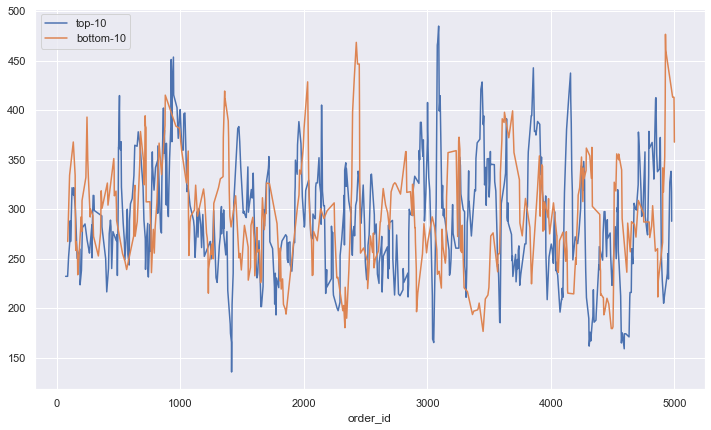

In [124]:
fig, ax = plt.subplots(1, 1)
top10.rolling(7).mean().plot(y='order_amount', ax=ax, label='top-10')
bottom10.rolling(7).mean().plot(y='order_amount', ax=ax, label='bottom-10')
plt.show()

C:\Users\dinar\AppData\Local\Temp\ipykernel_17004\174887463.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['created_at', 'payment_method'], dtype='object')
  top10[top10['shop_id'] == 53].rolling(7).mean().plot(y='order_amount')


<AxesSubplot:xlabel='order_id'>

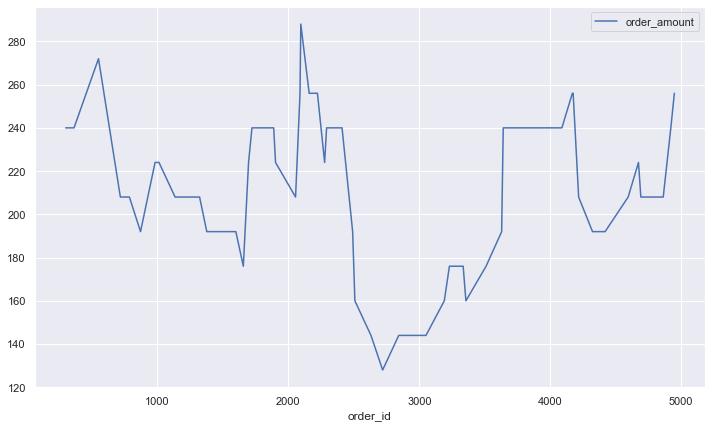

In [105]:
top10[top10['shop_id'] == 53].rolling(7).mean().plot(y='order_amount')

In [73]:
shopify[shopify['shop_id'] == 53].agg({'order_amount': ['min', 'mean', 'max', 'count']})

,order_amount
min,112.000000
mean,214.117647
max,560.000000
count,68.000000


In [12]:
shopify.created_at.min(), shopify.created_at.max()

(Timestamp('2017-03-01 00:08:09'), Timestamp('2017-03-30 23:55:35'))

In [29]:
data = shopify.groupby('shop_id').agg({'order_amount': ['mean', 'min', 'max'], 'total_items': ['count', 'mean']})
data.columns = ['usd_mean', 'usd_min', 'usd_max', 'n_items', 'n_mean']
data.sort_values(['usd_mean', 'n_mean'], ascending=False)

,usd_mean,usd_min,usd_max,n_items,n_mean
shop_id,,,,,
42,235101.490196,352,704000,51,667.901961
78,49213.043478,25725,154350,46,1.913043
50,403.545455,193,965,44,2.090909
90,403.224490,178,890,49,2.265306
38,390.857143,190,760,35,2.057143
...,...,...,...,...,...
53,214.117647,112,560,68,1.911765
100,213.675000,111,444,40,1.925000
32,189.976190,101,404,42,1.880952


In [33]:
shopify[(shopify['shop_id'] == 42) & (shopify['order_amount'] > 2000)]

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00


In [37]:
shopify[(shopify['shop_id'] == 78)]

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
161,78,990,25725,1,credit_card,2017-03-12 05:56:57
491,78,936,51450,2,debit,2017-03-26 17:08:19
494,78,983,51450,2,cash,2017-03-16 21:39:35
512,78,967,51450,2,cash,2017-03-09 07:23:14
618,78,760,51450,2,cash,2017-03-18 11:18:42
692,78,878,154350,6,debit,2017-03-27 22:51:43
1057,78,800,25725,1,debit,2017-03-15 10:16:45
1194,78,944,25725,1,debit,2017-03-16 16:38:26
1205,78,970,25725,1,credit_card,2017-03-17 22:32:21


## Exploratory Data Analysis

The description states that all the 100 shops sell only one model of shoes. We will first need to verify there are indeed 100 stores. Then, it is worth checking the price, total purchase, and frequency of buying. It will also be interesting to see the TOP places and check whether selling them for less drives the overall revenue.

Moreover, having Average Order Value (AOV) of &#36;3145.13 does not make any sense. The


We want to analyze the average order value (AOV). When looking at order data over a 30-day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

## Visualizations

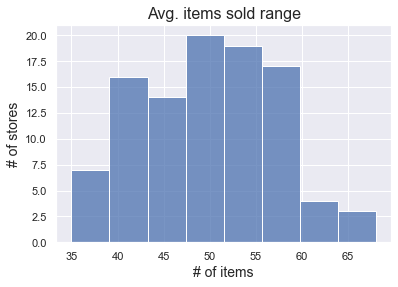

In [47]:
sns.histplot(data=data, x='n_items')
plt.title('Avg. items sold range', fontsize=16)
plt.xlabel('# of items', fontsize=14)
plt.ylabel('# of stores', fontsize=14)
plt.show()

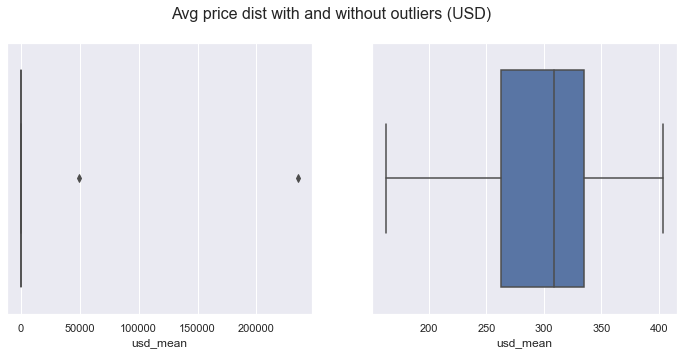

In [63]:
# sns.histplot(data=data, x='usd_mean', bins=30)
outliers = data[data['usd_mean'] > data['usd_mean'].std() * 1.5]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Avg price dist with and without outliers (USD)', fontsize=16)
sns.boxplot(data=data, x='usd_mean', ax=ax[0])
sns.boxplot(data=data.drop(index=outliers.index, axis='rows'), x='usd_mean', ax=ax[1])
plt.show()

In [60]:
data[data['usd_mean'] > data['usd_mean'].std() * 1.5]

,usd_mean,usd_min,usd_max,n_items,n_mean
shop_id,,,,,
42,235101.490196,352,704000,51,667.901961
78,49213.043478,25725,154350,46,1.913043


In [65]:
data.describe()

,usd_mean,usd_min,usd_max,n_items,n_mean
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3136.834088,407.990000,9269.290000,50.000000,8.652863
std,23935.881130,2557.462906,71837.231886,7.287737,66.590946
min,162.857143,90.000000,399.000000,35.000000,1.731707
25%,263.675962,132.750000,588.500000,44.750000,1.912724
50%,308.889758,153.000000,709.000000,50.000000,1.981125
75%,336.628352,168.250000,806.250000,55.000000,2.076250
max,235101.490196,25725.000000,704000.000000,68.000000,667.901961


In [66]:
shopify.describe()

,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,50.078800,849.092400,3145.128000,8.78720
std,29.006118,87.798982,41282.539349,116.32032
min,1.000000,607.000000,90.000000,1.00000
25%,24.000000,775.000000,163.000000,1.00000
50%,50.000000,849.000000,284.000000,2.00000
75%,75.000000,925.000000,390.000000,3.00000
max,100.000000,999.000000,704000.000000,2000.00000


## AOV

At Shopify, we have precisely 100 sneaker shops, and each of these shops sells only one model of shoe. We want to analyze the average order value (AOV). When looking at order data over a 30-day window, we naively calculate an AOV of 3145.13 USD. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


$$AOV=\frac{revenue}{# orders}$$

In [69]:
# with the outliers
# revenue    = shopify['order_amount'].sum()
# total_sold = shopify['total_items'].sum()
#
# aov        = revenue / total_sold
# aov

shopify['order_amount'].mean()

3145.128

In [71]:
no_outliers = shopify[~shopify['shop_id'].isin([42, 78])]
no_outliers['order_amount'].mean()

300.1558229655313